In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from tqdm import tqdm

In [12]:
flag = False
data_path = '../data/raw'
for filename in tqdm(os.listdir(data_path)):
    if filename.endswith('.csv'):
        if not flag:
            full_df = pd.read_csv(os.path.join(data_path, filename))
            full_df['label'] = filename.replace('.csv', '')
            flag = True
        else:
            curr_df = pd.read_csv(os.path.join(data_path, filename))
            curr_df['label'] = filename.replace('.csv', '')
            full_df = pd.concat([full_df, curr_df])

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:23<00:00,  1.13s/it]


In [13]:
full_df.label.value_counts()

unwanted_programs          83359
malware_detect             63700
ransomware_detect          59000
industrial_iot_security    56666
anti-counterfeit           32396
parental_control           14891
spyware_detect             14036
EDR                        11693
MDR                        10543
SASE                        9234
sandbox                     8135
SIEM                        6901
application_control         5238
CASB                        5160
atm_security                4488
honeypot                    3854
system_tweak                3775
SOAR                        3226
NDR                         2456
NGFW                        2283
Name: label, dtype: int64

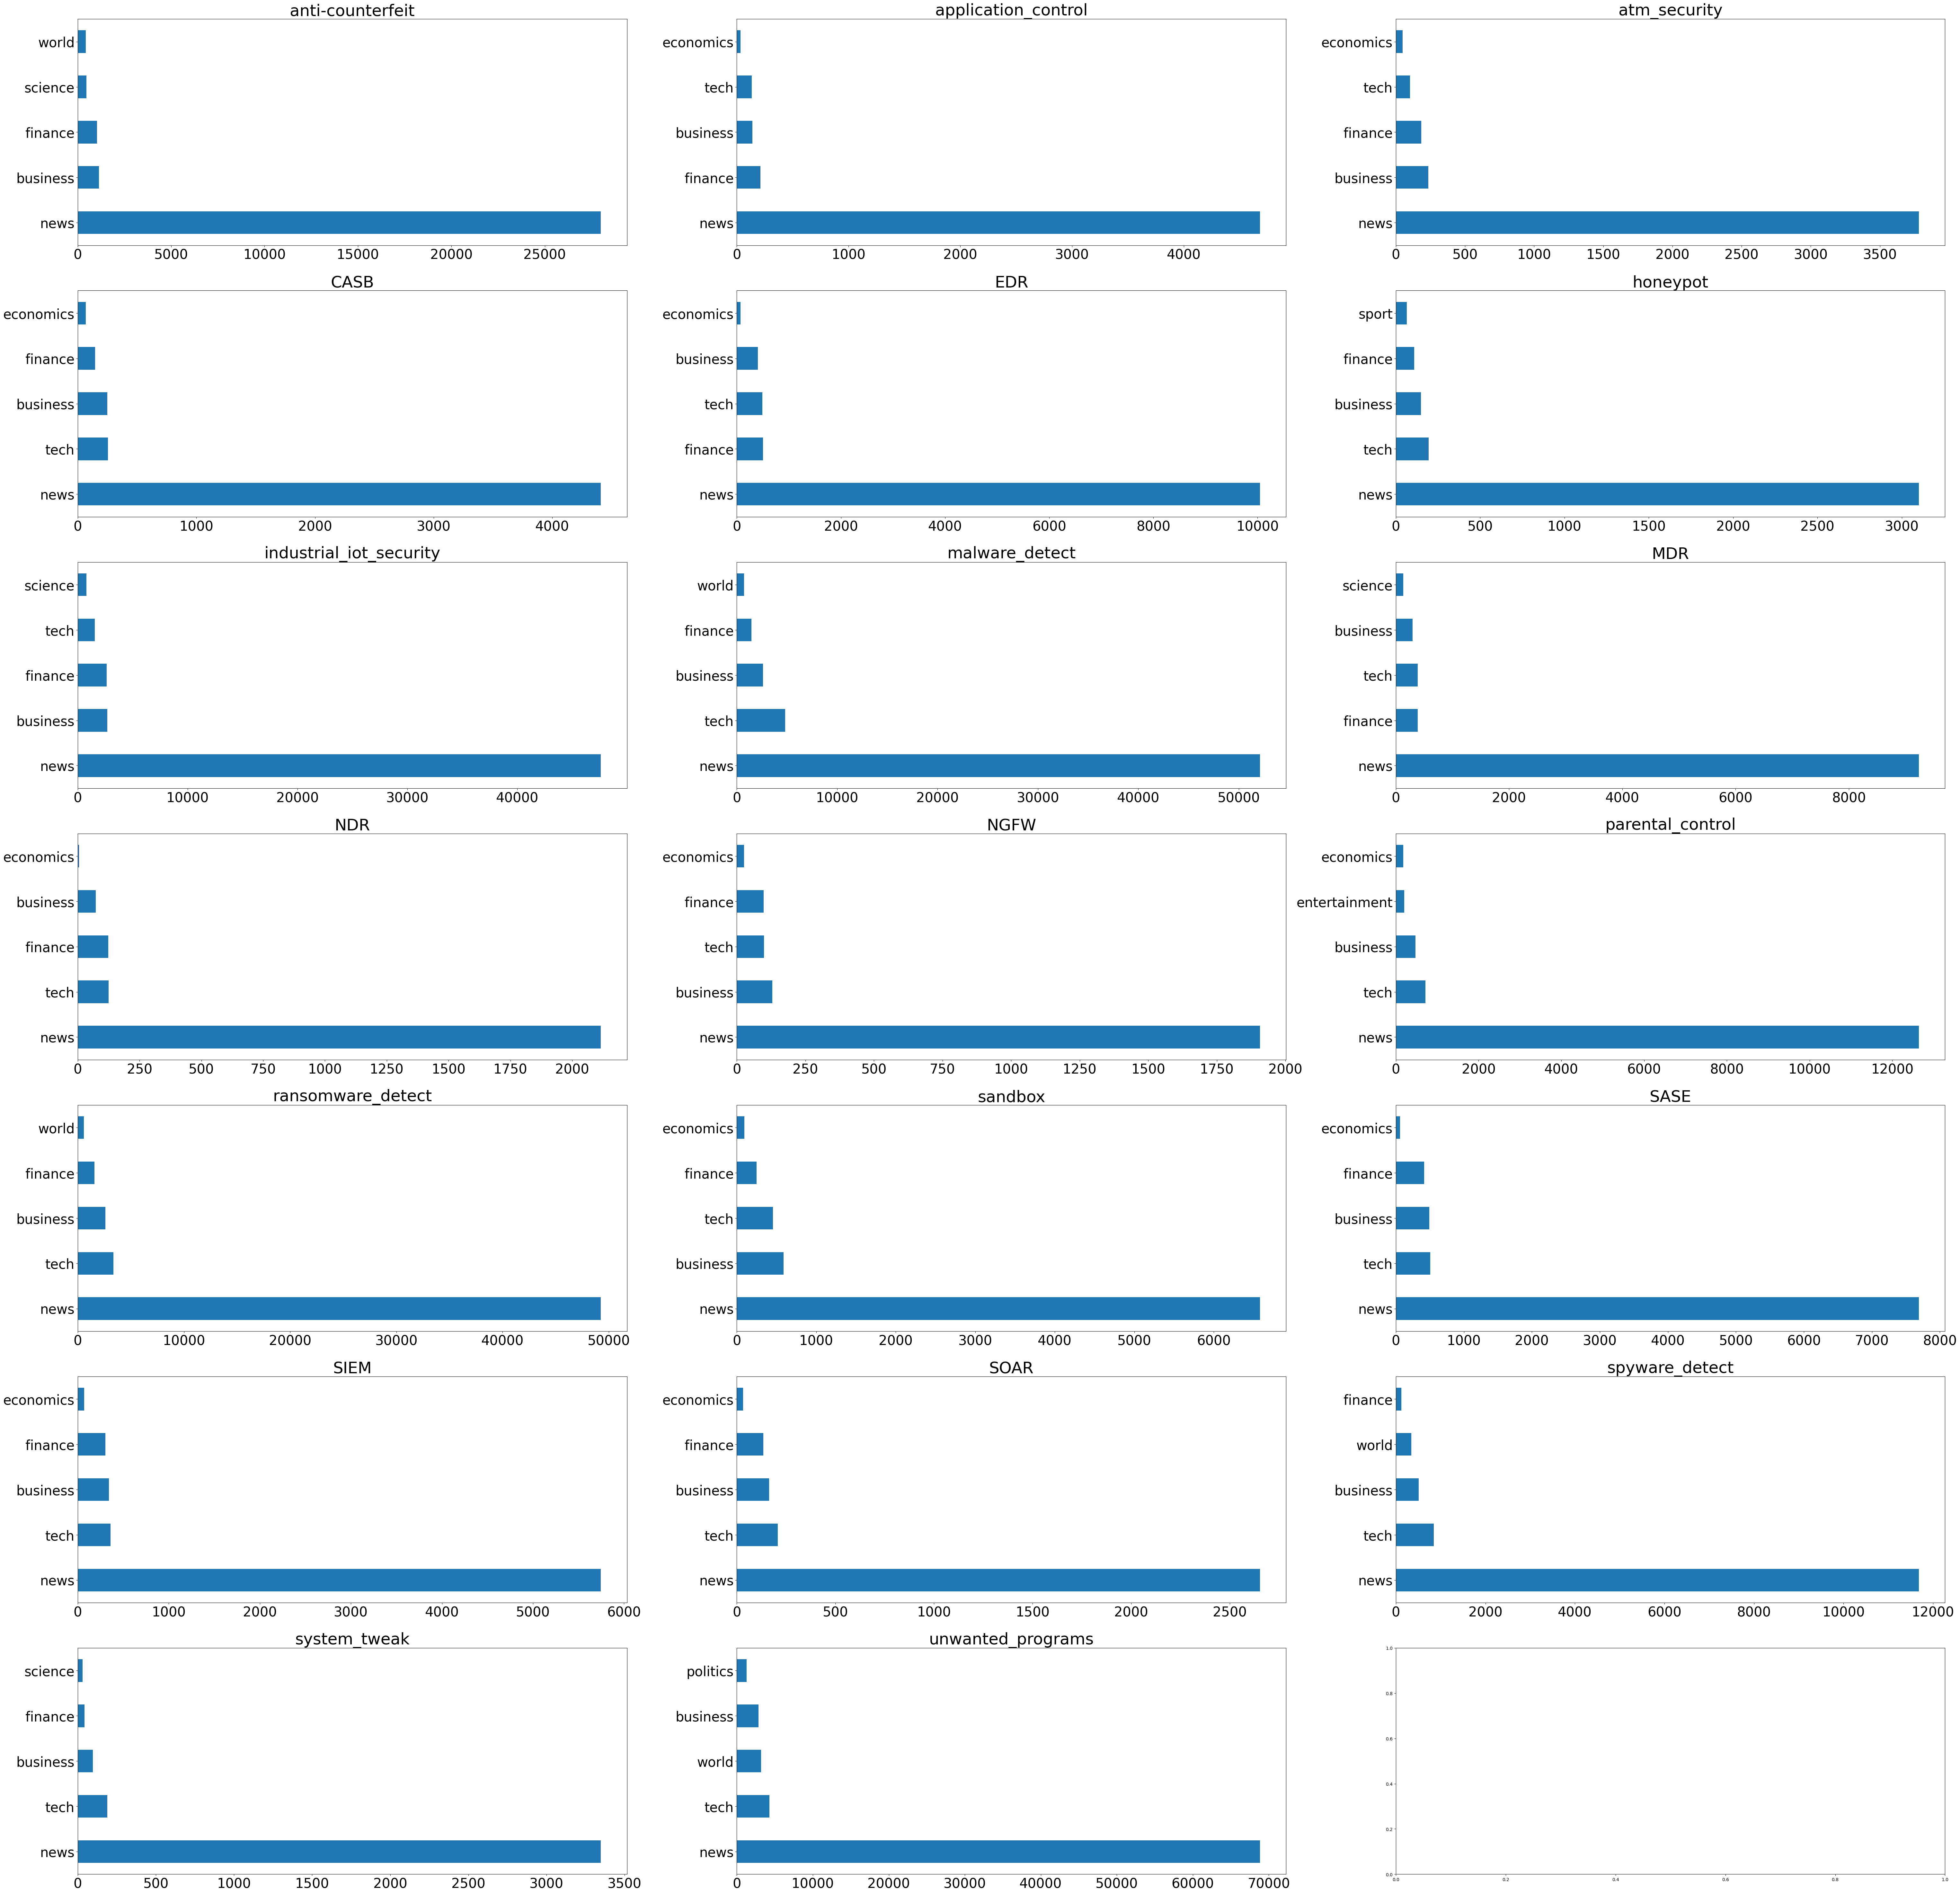

In [14]:
fig, axes = plt.subplots(7, 3, figsize = (75, 75))
for i, label in enumerate(full_df.label.unique()):
    curr_df = full_df.loc[full_df.label == label, :]
    curr_df.topic.value_counts().head().plot(kind='barh', ax = axes[i // 3][i % 3])
    axes[i // 3][i % 3].set_title(label, fontsize=36)
    axes[i // 3][i % 3].tick_params(axis='both', which='major', labelsize=30)

In [15]:
full_df = full_df.reset_index(drop = True)

In [16]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401034 entries, 0 to 401033
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              401034 non-null  object
 1   published_date  401034 non-null  object
 2   title           401033 non-null  object
 3   language        401034 non-null  object
 4   topic           401012 non-null  object
 5   link            401034 non-null  object
 6   country         401034 non-null  object
 7   summary         400007 non-null  object
 8   label           401034 non-null  object
dtypes: object(9)
memory usage: 27.5+ MB


In [17]:
clean_df = full_df.loc[full_df.summary.notna(), :]
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400007 entries, 0 to 401033
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              400007 non-null  object
 1   published_date  400007 non-null  object
 2   title           400006 non-null  object
 3   language        400007 non-null  object
 4   topic           399985 non-null  object
 5   link            400007 non-null  object
 6   country         400007 non-null  object
 7   summary         400007 non-null  object
 8   label           400007 non-null  object
dtypes: object(9)
memory usage: 30.5+ MB


In [18]:
import re
def count_words(text):
    n = len(text.split())
    return n

def n_sentensece(text):
    list_sent = re.compile('[!]|[/?]|[/?!]|[!/?]|[/.]').split(text)
    if len(' '.join(re.compile(r'[А-Яа-я\-]+').findall(list_sent[-1]))) > 0:
        n = len(list_sent)
    else:
        n = len(list_sent) - 1
    if n > 0:
        return n
    else:
        return 1

In [19]:
clean_df['num_words'] = clean_df.summary.map(count_words)
clean_df['num_sentences'] = clean_df.summary.map(n_sentensece)

C:\Users\1\AppData\Local\Temp\ipykernel_6828\2344581083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['num_words'] = clean_df.summary.map(count_words)
C:\Users\1\AppData\Local\Temp\ipykernel_6828\2344581083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['num_sentences'] = clean_df.summary.map(n_sentensece)


In [20]:
clean_df.describe()

,num_words,num_sentences
count,400007.000000,400007.000000
mean,896.660611,54.883985
std,937.754319,67.213431
min,1.000000,1.000000
25%,498.000000,26.000000
50%,738.000000,42.000000
75%,1077.000000,66.000000
max,212343.000000,10113.000000


In [21]:
unique_texts = full_df.summary.value_counts()[full_df.summary.value_counts() == 1].index
unique_texts.shape

(198716,)

In [22]:
unique_text_ind = full_df.loc[full_df.summary.isin(unique_texts), :].index
full_df.loc[unique_text_ind, 'label']

0          anti-counterfeit
1          anti-counterfeit
2          anti-counterfeit
3          anti-counterfeit
4          anti-counterfeit
                ...        
401025    unwanted_programs
401028    unwanted_programs
401030    unwanted_programs
401032    unwanted_programs
401033    unwanted_programs
Name: label, Length: 198716, dtype: object

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [25]:
le.fit(full_df.loc[unique_text_ind, 'label'])

LabelEncoder()

In [28]:
clean_df.drop_duplicates(clean_df[['summary', 'label']]).label.value_counts()

unwanted_programs          63022
malware_detect             48013
industrial_iot_security    43141
ransomware_detect          39544
anti-counterfeit           24041
parental_control           11197
spyware_detect              9753
EDR                         8779
SASE                        6554
sandbox                     6316
MDR                         5869
SIEM                        5293
application_control         4471
atm_security                3829
CASB                        3530
honeypot                    3478
system_tweak                3198
SOAR                        2446
NGFW                        1622
NDR                         1393
Name: label, dtype: int64

In [30]:
clean_df = full_df.loc[full_df.summary.notna(), :]
clean_df.drop_duplicates(clean_df[['summary', 'label']], inplace = True)

C:\Users\1\AppData\Local\Temp\ipykernel_6828\738874239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop_duplicates(clean_df[['summary', 'label']], inplace = True)


In [56]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(clean_df[['label']])

OneHotEncoder()

In [57]:
clean_df.loc[0:10, 'label']

0     anti-counterfeit
1     anti-counterfeit
2     anti-counterfeit
3     anti-counterfeit
4     anti-counterfeit
5     anti-counterfeit
6     anti-counterfeit
7     anti-counterfeit
8     anti-counterfeit
9     anti-counterfeit
10    anti-counterfeit
Name: label, dtype: object

In [116]:
pd.get_dummies(clean_df.label).columns

Index(['CASB', 'EDR', 'MDR', 'NDR', 'NGFW', 'SASE', 'SIEM', 'SOAR',
       'anti-counterfeit', 'application_control', 'atm_security', 'honeypot',
       'industrial_iot_security', 'malware_detect', 'parental_control',
       'ransomware_detect', 'sandbox', 'spyware_detect', 'system_tweak',
       'unwanted_programs'],
      dtype='object')

In [112]:
pd.concat([clean_df, pd.get_dummies(clean_df.label)], axis = 1)

,id,published_date,title,language,topic,link,country,summary,label,CASB,...,atm_security,honeypot,industrial_iot_security,malware_detect,parental_control,ransomware_detect,sandbox,spyware_detect,system_tweak,unwanted_programs
0,8df4cbef454b703efc1fa2182fa19464,2022-11-15 18:35:33,RFID Anti-Counterfeiting Tag market: Market Pl...,en,business,https://www.openpr.com/news/2808352/rfid-anti-...,DE,RFID Anti-Counterfeiting Tag market: Market Pl...,anti-counterfeit,0,...,0,0,0,0,0,0,0,0,0,0
1,55e4319b28151bf88de62331a9d78935,2022-11-11 03:18:53,Global Anti-Counterfeit Packaging Market SWOT ...,en,business,https://www.openpr.com/news/2802747/global-ant...,DE,Global Anti-Counterfeit Packaging Market SWOT ...,anti-counterfeit,0,...,0,0,0,0,0,0,0,0,0,0
2,c68aacc054eeb27cba80e2fcd5874a1a,2022-11-08 07:28:42,Holographic Anti-Counterfeiting Marks Market C...,en,news,https://heraldkeeper.com/market/holographic-an...,unknown,Holographic Anti-Counterfeiting Marks Market C...,anti-counterfeit,0,...,0,0,0,0,0,0,0,0,0,0
3,6ae385eb692157ceeee345815c224cf0,2022-11-29 01:29:13,Anti-counterfeit Pharmaceutical Packaging Mark...,en,news,https://www.taiwannews.com.tw/en/news/4735391,TW,Research Viewpoint on Anti-counterfeit Pharmac...,anti-counterfeit,0,...,0,0,0,0,0,0,0,0,0,0
4,d40e2137da838ddc33cdc66f4e964afa,2022-11-03 14:15:23,Anti-Counterfeit Packaging Market Growth Prosp...,en,news,https://www.openpr.com/news/2791697/anti-count...,DE,Anti-Counterfeit Packaging Market Growth Prosp...,anti-counterfeit,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401029,834ef5e3fe0fb2d3ceb96c8d17714f9a,2020-04-07 09:45:04,Honor 9X Pro: Better specs can't save this sma...,en,news,https://www.theregister.com/2020/04/07/honor_9...,GB,Hands On Smartphone manufacturers love to use ...,unwanted_programs,0,...,0,0,0,0,0,0,0,0,0,1
401030,e64038ff871f4f175c29f883aba17850,2020-04-29 11:58:01,April 2020: The Best Deals on Apple Products a...,en,news,https://www.iphonehacks.com/2020/04/best-deals...,US,Welcome to iPhoneHacks' Daily Deals post for A...,unwanted_programs,0,...,0,0,0,0,0,0,0,0,0,1
401031,305c3c456c93d3b663aea79b90cd940b,2020-04-03 10:09:21,BOFH: Will the last one out switch off the pri...,en,news,https://www.theregister.com/2020/04/03/bofh_20...,GB,Episode 6 >beedle< >beedle< >boop< >beedle< >b...,unwanted_programs,0,...,0,0,0,0,0,0,0,0,0,1
401032,b93c18d2a492b9797ebe1e020bbe24fc,2020-04-03 14:00:00,"Friday's Best Deals: Children's Books, Circula...",en,news,https://kinjadeals.theinventory.com/fridays-be...,US,"A large heating pad, Comixology Marvel sale, I...",unwanted_programs,0,...,0,0,0,0,0,0,0,0,0,1


In [119]:
from sklearn.preprocessing import OneHotEncoder
clean_df2 = clean_df.copy()
remove_index = []
curr = pd.get_dummies(clean_df2.label)
labels = curr.columns
clean_df2 = pd.concat([clean_df2, pd.get_dummies(clean_df2.label)], axis = 1)
ununique_text = clean_df2.summary.value_counts()[clean_df2.summary.value_counts() > 1].index
for text in tqdm(ununique_text):
    curr_ind = clean_df2.loc[clean_df2.summary == text, :].index
    curr_labels = clean_df2.loc[curr_ind, labels].sum(0)
    remove_index.extend(curr_ind[1:])
    clean_df2.loc[curr_ind[0], labels] = curr_labels
    
    

 47%|███████████████████████████████████▍                                        | 17449/37477 [12:13<14:02, 23.79it/s]


KeyboardInterrupt: 

In [84]:
clean_df2.drop(remove_index, inplace = True)

In [85]:
clean_df2.to_csv('clean_data.csv')

In [86]:
clean_df2.label.value_counts()

unwanted_programs          53377
malware_detect             43743
industrial_iot_security    41638
anti-counterfeit           24041
ransomware_detect          19729
parental_control           10799
EDR                         8515
spyware_detect              5382
sandbox                     5353
application_control         4468
SASE                        4270
MDR                         4254
atm_security                3794
CASB                        3494
honeypot                    3434
SIEM                        3265
system_tweak                2909
SOAR                        1303
NGFW                        1116
NDR                          875
Name: label, dtype: int64

In [87]:
clean_df2.columns

Index(['id', 'published_date', 'title', 'language', 'topic', 'link', 'country',
       'summary', 'label', 'anti-counterfeit', 'application_control',
       'atm_security', 'CASB', 'EDR', 'honeypot', 'industrial_iot_security',
       'malware_detect', 'MDR', 'NDR', 'NGFW', 'parental_control',
       'ransomware_detect', 'sandbox', 'SASE', 'SIEM', 'SOAR',
       'spyware_detect', 'system_tweak', 'unwanted_programs'],
      dtype='object')

In [96]:
text = clean_df2.summary[32396]

In [98]:
clean_df.loc[clean_df.summary == text, :]

,id,published_date,title,language,topic,link,country,summary,label
32396,182e2db6b3c40ec8fec833f848cb2bd9,2022-11-29 09:56:00,Application Control Market Size worth US$ 2.24...,en,news,https://www.openpr.com/news/2825937/applicatio...,DE,Application Control Market Size worth US$ 2.24...,application_control


In [104]:
clean_df2.loc[clean_df2.NDR > 0].NDR

32396    1
32397    1
32398    1
32399    1
32400    1
        ..
37629    1
37630    1
37631    1
37632    1
37633    1
Name: NDR, Length: 4471, dtype: uint8

In [109]:
clean_df2.loc[32396 : 32400, ['summary', 'label'] + list(labels[10:])]

,summary,label,NGFW,parental_control,ransomware_detect,sandbox,SASE,SIEM,SOAR,spyware_detect,system_tweak,unwanted_programs
32396,Application Control Market Size worth US$ 2.24...,application_control,0,0,0,0,0,0,0,0,0,0
32397,Application Control Gateway Market Business ov...,application_control,0,0,0,0,0,0,0,0,0,0
32398,"ABBABB (Zurich, Switzerland) demonstrated its ...",application_control,0,0,0,0,0,0,0,0,0,0
32399,"CatchPulse protects Windows home devices, ente...",application_control,0,0,0,0,0,0,0,0,0,0
32400,"Cloud securitySC StaffNovember 29, 2022FortiGa...",application_control,0,0,0,0,0,0,0,0,0,0


In [90]:
clean_df.label.value_counts()

unwanted_programs          63022
malware_detect             48013
industrial_iot_security    43141
ransomware_detect          39544
anti-counterfeit           24041
parental_control           11197
spyware_detect              9753
EDR                         8779
SASE                        6554
sandbox                     6316
MDR                         5869
SIEM                        5293
application_control         4471
atm_security                3829
CASB                        3530
honeypot                    3478
system_tweak                3198
SOAR                        2446
NGFW                        1622
NDR                         1393
Name: label, dtype: int64

In [ ]:
ununique_text = clean_df2.summary.value_counts()[clean_df2.summary.value_counts() > 1].index
labels_dict = {}
for text in tqdm(ununique_text):
    if text in labels_dict:
        labels_dict[text].append(le.transform

In [115]:
text = clean_df.summary.value_counts()[clean_df.summary.value_counts() > 1].index[0]

In [116]:
clean_df.loc[clean_df.summary == text, :]

,published_date,title,language,topic,link,country,summary,label
id,,,,,,,,
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,application_control
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,CASB
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,EDR
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,malware_detect
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,MDR
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,NDR
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,NGFW
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,sandbox
eca306635601c10b5064d5ea73c42cca,2022-04-29 20:10:00,Best Cybersecurity Software (2022 Update),en,news,https://www.esecurityplanet.com/products/best-...,US,Standalone cybersecurity tools are not enough ...,SASE


In [102]:
le.transform(clean_df.label).shape

(295489,)

In [95]:
ununique_text = clean_df.summary.value_counts()[clean_df.summary.value_counts() > 1].index

Index(['Standalone cybersecurity tools are not enough to maintain the security posture of an entire organization. Between malware, phishing attacks, zero-day threats, advanced persistent threats, reconnaissance, and brute force attacks, hackers are looking for any and every avenue into a network. A number of solutions may be needed to protect against all of these threats if organizations don't opt for full security suites. In this article, we'll cover some of the most important tools to have in your security arsenal and some of the best vendors in each category. Top Cybersecurity Software We've narrowed this list down to four categories of software that are essential to modern cybersecurity: Extended detection and response (XDR), next-generation firewalls (NGFW), cloud access security brokers (CASB), and security information and event management (SIEM).  If you're here looking for antivirus software, see our list of the best antivirus software for 2021. Jump to: Best XDR Tools Extended

In [86]:
for ind in clean_df.index:
    text = clean_df.loc[ind, 'summary']
    if text in unique_texts:
        
    

array(['anti-counterfeit', 'application_control', 'atm_security', 'CASB',
       'EDR', 'honeypot', 'industrial_iot_security', 'malware_detect',
       'MDR', 'NDR', 'NGFW', 'parental_control', 'ransomware_detect',
       'sandbox', 'SASE', 'SIEM', 'SOAR', 'spyware_detect',
       'system_tweak', 'unwanted_programs'], dtype=object)

In [88]:
labels

array(['anti-counterfeit', 'application_control', 'atm_security', 'CASB',
       'EDR', 'honeypot', 'industrial_iot_security', 'malware_detect',
       'MDR', 'NDR', 'NGFW', 'parental_control', 'ransomware_detect',
       'sandbox', 'SASE', 'SIEM', 'SOAR', 'spyware_detect',
       'system_tweak', 'unwanted_programs'], dtype=object)

In [92]:
le.transform(['anti-counterfeit', 'application_control', 'parental_control', 'ransomware_detect',
       'sandbox', 'SASE', 'SIEM'])

array([ 8,  9, 14, 15, 16,  5,  6])